# Task2: Using the pandas Python Library.

In [ ]:
import requests
#get the data from a download link
download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"
response = requests.get(download_url)
response.raise_for_status() #check that the request was successful
#save the file nba_all_elo.csv in your current working directory
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("download ready")

In [1]:
#importing pandas in Python with the pd alias
import pandas as pd

#read in the dataset and store it as a DataFrame object in the variable nba
#when you copy the file path, if you get the FileNotFoundError: [Errno 2]
#then flip the backslash to a forward slash, and voila, it works!
nba = pd.read_csv("nba_all_elo.csv")

#check nba's type, it should be a DataFrame
type(nba)

pandas.core.frame.DataFrame

In [ ]:
#len() determines the number of rows (observations) in a dataset
len(nba)
#.shape determines dimensionality
#the result is a tuple containing number of rows and columns
nba.shape

#take a look at the first five rows to see the actual data
nba.head()
#configure pandas to display all 23 columns
pd.set_option("display.max.columns", None)
#show only two decimal places
pd.set_option("display.precision", 2)
#display last five rows
nba.tail()


# Question.1: 
Display the first 3 rows of your dataset. Remember that the default nba.head() shows the first 5 rows.

Hint: always refer to the documentation; the chances are that you will find a solution by tweaking
some optional parameters.

# Solution 1:

In [2]:
nba.head(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN


# Solution 1 Ends

# Task3: Get to Know Your Data.

In [ ]:
#you can put anything into a list, but the columns of a DataFrame contain values of a specific data type.
#by comparing pandas and Python data structures, you will see that this behaviour makes pandas much faster!
#display all columns and their data types with .info()
nba.info()

In [ ]:
#get an idea of the values each column contains
nba.describe()

In [3]:
#you can provide other data types using the include parameter 
import numpy as np
nba.describe(include=np.object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,194611010TRH,NBA,4/13/2011,BOS,Lakers,BOS,Lakers,H,L,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


# Question.2: 
Take a look at the team_id and fran_id (franchise) columns.
What observations can you make at this point (i.e. do you see anything strange here)? 
Write your initial observation, then carry on with section 3.3 to be able to answer it by exploring your dataset

# Solution 2

The result of **nba.describe(include=np.object)** shows that for the francise Lakers there are 6024 matches but when we check the team ID column, we have Bostan Celtics has played 5997 matches, which means Los Angel Lakers has played much lesser that BOS. Let us identify which other team has playes for Lakers franchise.

In [4]:
nba[nba['fran_id'] == 'Lakers'][['team_id']].value_counts()

team_id
LAL        5078
MNL         946
dtype: int64

So, we can clearly see that out 6024 matches of Lakers franchise, 5078 matches were played by Los Angels Lakers and 946 matches were played by Minneapolis Lakers. Lets see when MNL and LAL represented Lakers.

In [5]:
nba.loc[nba['team_id'] == 'MNL' , 'date_game'].min()

'1/1/1949'

In [6]:
nba.loc[nba['team_id'] == 'MNL' , 'date_game'].max()

'4/9/1959'

In [7]:
nba.loc[nba['team_id'] == 'LAL' , 'date_game'].min()

'1/1/1961'

In [8]:
nba.loc[nba['team_id'] == 'LAL' , 'date_game'].max()

'6/9/2009'

So we can clearly conclude that Minneapolis Lakers played for Lakers from 1949 to 1959 and Los Angel Lakers played from 1961 to 2009 for Lakers.

# Solution 2 Ends

In [ ]:
nba["team_id"].value_counts()
nba["fran_id"].value_counts()

In [ ]:
#find out when they played those games
nba.loc[nba["team_id"] == "MNL", "date_game"].min()
nba.loc[nba["team_id"] == "MNL", "date_game"].max()
nba.loc[nba["team_id"] == "MNL", "date_game"].agg(("min", "max")) #aggregate the two functions

# Question.3 : 
Find out how many wins and losses the Minneapolis Lakers had and how many points they scored during the matches in the dataset.

# Solution 3

In [9]:
print('Wins and Losses:\n',nba.loc[nba['team_id'] == "MNL", 'game_result'].value_counts(),sep = '')
print('\nPoints Scored During the Matches:\n',nba.loc[nba['team_id'] == "MNL", 'pts'].sum(),sep = '')

Wins and Losses:
W    524
L    422
Name: game_result, dtype: int64

Points Scored During the Matches:
88229


# Solution 3 Ends

# Question.4: 
Now you understand why the Boston Celtics team "BOS" played the most games in the dataset, find out how many points the Boston
Celtics have scored during all matches contained in this dataset.

# Solution 4

In [10]:
print('Points Scored By Boston Celtics During all the Matches:',nba.loc[nba['team_id'] == "BOS", 'pts'].sum())

Points Scored By Boston Celtics During all the Matches: 626484


# Solution 4 Ends

# Question.5:
After exploring your dataset, explain your observations from Question.2 in a structured way

# Solution 5

In [11]:
nba[nba['team_id'] == 'LAL'][['team_id','fran_id']].drop_duplicates()

,team_id,fran_id
9730,LAL,Lakers


In [12]:
nba[nba['team_id'] == 'MNL'][['team_id','fran_id']].drop_duplicates()

,team_id,fran_id
1136,MNL,Lakers


In [13]:
nba[nba['team_id'] == 'BOS'][['team_id','fran_id']].drop_duplicates()

,team_id,fran_id
6,BOS,Celtics


In [14]:
nba[nba['fran_id'] == 'Celtics'][['team_id']].value_counts()

team_id
BOS        5997
dtype: int64

We can observe that the franchise Lakers has the highest number of matches played compared to all other franchises. Los Angel Lakers and Minneapolis Lakers played for Lakers which was together 6024 matches making the franchise Lakers to have the highest number of matches.

We also observe that the team which played highest number of matches is Bostan Celtics which belongs to Celtics which is also the total number of matches for Celtics.

# Solution 5 Ends

# Task4: Data Access methods (loc and iloc).

In [ ]:
#Examples:

#accessing data using a label
#city_data.loc["Amsterdam"]

#accessing data between two labels
#city_data.loc["Tokyo": "Toronto"]

#accessing data using the positional index
nba.iloc[1]


# Question.6 (report your answer):
6.1) Use a data access method to display the 4th row from the bottom of the nba dataset.

6.2) Use a data access method to display the 2nd row from the top of the nba dataset.

6.3) Access all games between the labels 5555 and 5559; you only want to see the names of teams and the scores

# Solution 6.1

In [15]:
nba.iloc[-4]

gameorder               63156
game_id          201506140GSW
lg_id                     NBA
_iscopy                     0
year_id                  2015
date_game           6/14/2015
seasongame                102
is_playoffs                 1
team_id                   GSW
fran_id              Warriors
pts                       104
elo_i               1809.9791
elo_n               1813.6349
win_equiv           68.013329
opp_id                    CLE
opp_fran            Cavaliers
opp_pts                    91
opp_elo_i           1704.3949
opp_elo_n           1700.7391
game_location               H
game_result                 W
forecast             0.765565
notes                     NaN
Name: 126310, dtype: object

# Solution 6.2

In [16]:
nba.iloc[1]

gameorder                   1
game_id          194611010TRH
lg_id                     NBA
_iscopy                     1
year_id                  1947
date_game           11/1/1946
seasongame                  1
is_playoffs                 0
team_id                   NYK
fran_id                Knicks
pts                        68
elo_i                  1300.0
elo_n               1306.7233
win_equiv            41.70517
opp_id                    TRH
opp_fran              Huskies
opp_pts                    66
opp_elo_i              1300.0
opp_elo_n           1293.2767
game_location               A
game_result                 W
forecast             0.359935
notes                     NaN
Name: 1, dtype: object

# Solution 6.3

In [17]:
nba.iloc[5556:5559][['team_id','opp_id','pts','opp_pts']]

,team_id,opp_id,pts,opp_pts
5556,BOS,NYK,95,74
5557,NYK,BOS,74,95
5558,ROC,SYR,81,86


The question says to show rows 'Between 5555 and 5559' and not 'From 5555 to 5559'. So the rows 5555 and 5559 are excluded.

# Solution 6 Ends

# Task5: Querying the Dataset.

In [ ]:
#create a new DataFrame that contains only games played after 2010
current_decade = nba[nba["year_id"] > 2010]
current_decade.shape

# Question.7:
Create a new DataFrame that consists of the games played between 2000 and 2009.

# Solution 7

In [18]:
nba_new = nba[(nba['year_id'] >2000) & (nba['year_id'] <2009)]
print(nba_new.shape)
nba_new

(20652, 23)


,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
87750,43876,200010310ATL,NBA,0,2001,10/31/2000,1,0,ATL,Hawks,...,26.311760,CHH,Pelicans,106,1557.8643,1570.7832,H,L,0.372095,NaN
87751,43876,200010310ATL,NBA,1,2001,10/31/2000,1,0,CHH,Pelicans,...,48.286263,ATL,Hawks,82,1366.9685,1354.0496,A,W,0.627905,NaN
87752,43877,200010310CHI,NBA,0,2001,10/31/2000,1,0,CHI,Bulls,...,23.012793,SAC,Kings,100,1535.6016,1545.7308,H,L,0.348282,NaN
87753,43877,200010310CHI,NBA,1,2001,10/31/2000,1,0,SAC,Kings,...,45.715614,CHI,Bulls,81,1326.7501,1316.6208,A,W,0.651718,NaN
87754,43878,200010310DAL,NBA,0,2001,10/31/2000,1,0,DAL,Mavericks,...,45.668037,MIL,Bucks,93,1522.6825,1518.8068,H,W,0.664490,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108397,54199,200806120LAL,NBA,0,2008,6/12/2008,101,1,LAL,Lakers,...,61.411533,BOS,Celtics,97,1695.3843,1707.1495,H,L,0.680708,NaN
108398,54200,200806150LAL,NBA,0,2008,6/15/2008,102,1,LAL,Lakers,...,61.766636,BOS,Celtics,98,1707.1495,1702.6226,H,W,0.650576,NaN
108399,54200,200806150LAL,NBA,1,2008,6/15/2008,107,1,BOS,Celtics,...,60.409267,LAL,Lakers,103,1715.1279,1719.6549,A,L,0.349424,NaN
108400,54201,200806170BOS,NBA,1,2008,6/17/2008,103,1,LAL,Lakers,...,60.245529,BOS,Celtics,131,1702.6226,1721.6619,A,L,0.382819,NaN


# Solution 7 Ends

In [ ]:
#selecting rows where a specific field is not null .notnull() or .notna()
games_with_notes = nba[nba["notes"].notnull()]
games_with_notes.shape

In [ ]:
#filter your dataset and find all games where the home team's name ends with "ers".
ers = nba[nba["fran_id"].str.endswith("ers")]
ers.shape

In [ ]:
#search for Baltimore games where both teams scored over 100 points.
#In order to see each game only once, you’ll need to exclude duplicates
nba[(nba["_iscopy"] == 0) & (nba["pts"] > 100) & (nba["opp_pts"] > 100) & (nba["team_id"] == "BLB")]

# Question.8:
Filter your dataset and find all the playoffs games where the number of points scored by both home and away was more than 100 in 2011 and make sure you do not include duplicates (do notforget the parentheses).

# Solution 8

In [19]:
nba[(nba['is_playoffs'] == 1) & (nba['pts'] > 100) & (nba['opp_pts']>100) & (nba['year_id'] == 2011) & (nba['_iscopy'] == 0)]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
116128,58065,201104170OKC,NBA,0,2011,4/17/2011,83,1,OKC,Thunder,...,57.193829,DEN,Nuggets,103,1635.5801,1631.8573,H,W,0.675665,NaN
116178,58090,201104250DEN,NBA,0,2011,4/25/2011,86,1,DEN,Nuggets,...,53.039177,OKC,Thunder,101,1681.7482,1676.8589,H,W,0.550426,NaN
116193,58097,201104270SAS,NBA,0,2011,4/27/2011,87,1,SAS,Spurs,...,52.749161,MEM,Grizzlies,103,1606.2883,1600.8541,H,W,0.649367,NaN
116205,58103,201105010OKC,NBA,0,2011,5/1/2011,88,1,OKC,Thunder,...,56.499226,MEM,Grizzlies,114,1607.3979,1628.1342,H,L,0.729509,NaN
116213,58107,201105030OKC,NBA,0,2011,5/3/2011,89,1,OKC,Thunder,...,57.003559,MEM,Grizzlies,102,1628.1342,1622.4935,H,W,0.679919,NaN
116233,58117,201105090MEM,NBA,0,2011,5/9/2011,92,1,MEM,Grizzlies,...,52.526051,OKC,Thunder,133,1657.4073,1670.6829,H,L,0.602617,NaN
116248,58125,201105170DAL,NBA,0,2011,5/17/2011,93,1,DAL,Mavericks,...,60.352184,OKC,Thunder,112,1677.5952,1671.6759,H,W,0.666656,NaN
116258,58130,201105230OKC,NBA,0,2011,5/23/2011,98,1,OKC,Thunder,...,56.792259,DAL,Mavericks,112,1702.6158,1713.3115,H,L,0.599898,NaN
116275,58138,201106090DAL,NBA,0,2011,6/9/2011,102,1,DAL,Mavericks,...,61.774223,MIA,Heat,103,1722.4176,1715.7157,H,W,0.630233,NaN


We can observe that there are only 9 matches where both the teams scored more than 100 points in playoffs in 2011 season.

# Solution 8 Ends

# Task6: Grouping and Aggregating your Data.

In [ ]:
#grouping - group all games for fran_id and sum their points and override the default of sorting
nba.groupby("fran_id", sort=False)["pts"].sum()

#group by multiple columns
nba[(nba["fran_id"] == "Spurs") & (nba["year_id"] > 2010)].groupby(["year_id", "game_result"])["game_id"].count()

# Question.9:
Take a look at the New York Knicks 2011-12 season (year_id: 2012).
How many wins and losses did they score during the regular season and the playoffs?

# Solution 9

In [20]:
nba[(nba['team_id'] == 'NYK') & (nba['year_id'] == 2012)].groupby(['is_playoffs', 'game_result'])["game_id"].count()

is_playoffs  game_result
0            L              30
             W              36
1            L               4
             W               1
Name: game_id, dtype: int64

We can observe that is_playoffs column says that if value is 0 it means its a regular season and 1 means its playoff. So we split based on is_playoffs and fetched the counts of wins and losses in each type of play.

# Solution 9 Ends

# Task7: Manipulating Columns.

In [ ]:
#create a copy of your original DataFrame to work with
df = nba.copy()
df.shape

#define new columns based on the existing ones
df["difference"] = df.pts - df.opp_pts
df.shape

#use an aggregation function .max() to find the largest value of your new column
df["difference"].max()

#rename the columns of your dataset
renamed_df = df.rename(columns={"game_result": "result", "game_location": "location"})
renamed_df.info()

In [ ]:
#delete unwanted columns – you will not be analysing Elo ratings here, so go ahead and delete them
df.shape
elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
df.drop(elo_columns, inplace=True, axis=1)
df.shape

# Task8: Specifying Data Types.

In [ ]:
#take a look at the DataFrame
df.info()

In [ ]:
# use .to_datetime() to specify all game dates as datetime objects.
df["date_game"] = pd.to_datetime(df["date_game"])

In [ ]:
#game_location column can have only three different values.
#you can see this by executing this code
df["game_location"].nunique()
df["game_location"].value_counts()

#change the data type to categorical and check it
df["game_location"] = pd.Categorical(df["game_location"])
df["game_location"].dtype

# Question.10:
Find another column in the nba dataset with a generic data type and convert it to a more specific one.

# Solution 10

In [21]:
df = nba.copy()
print('Number of distinct values in game result:',df["game_result"].nunique())
print('\nCounts of Wins and Losses:\n',df["game_result"].value_counts(),sep='')
df['game_result'] = pd.Categorical(df['game_result'])
df['game_result'].dtype

Number of distinct values in game result: 2

Counts of Wins and Losses:
L    63157
W    63157
Name: game_result, dtype: int64


CategoricalDtype(categories=['L', 'W'], ordered=False)

# Solution 10 Ends

# Task9: Cleaning the Data

In [ ]:
#1st way- usually best approach is to ignore them, remove all rows with missing values
rows_without_missing_data = nba.dropna()
rows_without_missing_data.shape

#2nd way - drop columns if they are not relevant to your analysis
data_without_missing_columns = nba.dropna(axis=1)
data_without_missing_columns.shape

#3rd way - replace the missing values with a meaningful default value for your use case
data_with_default_notes = nba.copy()
data_with_default_notes["notes"].fillna(value="no notes at all", inplace=True)
data_with_default_notes["notes"].describe()

In [ ]:
#selecting the games where pts are 0
nba[nba["pts"] == 0]

In [ ]:
#check using the .empty() attribute
nba[(nba["pts"] > nba["opp_pts"]) & (nba["game_result"] != 'W')].empty
nba[(nba["pts"] < nba["opp_pts"]) & (nba["game_result"] != 'L')].empty

# Task10: Data Visualisation

In [ ]:
#include this line to show plots directly in the notebook
%matplotlib inline

#visualise how many points the Knicks scored throughout the seasons
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

In [ ]:
#create a bar plot to show the franchises with the most games played
nba["fran_id"].value_counts().head(10).plot(kind="bar")

# Question.11:
11.1) Explain what the above line plot, showing how many points the Knicks scored throughout the seasons, reveals to you (i.e. describe what you find out).

11.2) Describe what the above bar plot reveals about the franchises with the most games played.

11.3) In 2013, the Miami Heat won the championship. Create a pie plot showing the count of their wins and losses during that season. (First, define a criterion to include only the Heat's games from 2013. Then, create a plot in the same way as you have seen above)

# Solution 11.1

During the 1950's Knicks scored around 4000 points which is very less compared that over time.

Later there was almost 100 percent increase in 1960 which is almost 8000 points compared to 1950.

1970 being the highest scored in all the seasons of Knicks with over 11000 points.

In the rest of the years Knicks points were maintained close to 10000 and not less than 8000 till 2000.

In 2000 there is a drastic drop in overall score to 6000 which is the lowest after 1960's.

After year 2000, points were maintained in an interval of 7000-9000, till 2010-2011.

# Solution 11.2

The bar plot shows the top 10 franchises in the order of highest number matches played.

Lakers played the highest number of matches and tops the list and is the only franchise with maches over 6000.

Celtics is just behind Lakers close to 6000 matches.

Knicks, Warriors, Pistons, Sixers, Hawks and Kings are in next positions with matches over 5000, followed by Wizards and Spurs with number of matches just over 4000 and Spurs being at the 10th position.

# Solution 11.3

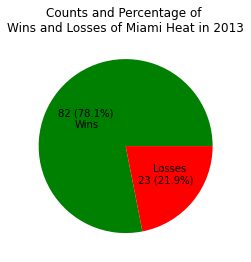

In [24]:
mh_data = nba[(nba['year_id'] == 2013) & (nba['fran_id'] == 'Heat')]
mh_data['game_result'].replace('W','Wins',inplace = True)
mh_data['game_result'].replace('L','Losses',inplace = True)
plot_data = mh_data['game_result'].value_counts()
counts = list(plot_data)

def fetch_count(val):
    num = int(round(val/100.*sum(counts), 0))
    cnt = str(num)+' ('+str(round(val,2))+'%)'
    return cnt

mh_plot = plot_data.plot(kind = 'pie', autopct = fetch_count, colors = ['green','red'],labeldistance = 0.4)
mh_plot.set_title('Counts and Percentage of \nWins and Losses of Miami Heat in 2013')
mh_plot.set_axis_off()

# Solution 11 Ends